# Analiza pokrycia szczepień BCG przeciw gruźlicy w 164 krajach świata
#### Celem niniejszej analizy jest identyfikacja krajów, które na przestrzeni lat odnotowały znaczącą poprawę w zakresie wyszczepialności przeciwko gruźlicy (szczepionka BCG), mimo początkowo niskiego poziomu pokrycia. Pozwoli to lepiej zrozumieć potencjalne czynniki sukcesu i skutecznej polityki zdrowotnej. Równocześnie analiza umożliwia wskazanie krajów, w których poziom szczepień nadal pozostaje niski – co może stanowić punkt wyjścia do dalszych działań wspierających i humanitarnych.

*Dane użyte w analizie pochodzą z platformy Kaggle, z raportu UNICEF dotyczącego szczepień dzieci na świecie, zawierającego roczne szacunki poziomu pokrycia różnych szczepień na poziomie krajowym.*

## Czym jest szczepionka BCG?
Szczepionka BCG (Bacillus Calmette-Guérin) jest jedyną dostępną szczepionką przeciwko gruźlicy (TB — tuberculosis). Jest szczególnie skuteczna w zapobieganiu ciężkim postaciom gruźlicy u dzieci, takim jak gruźlicze zapalenie opon mózgowo-rdzeniowych czy gruźlica rozsiana. Podaje się ją jednorazowo w pierwszych dniach lub tygodniach życia dziecka.

##### Gruźlica nadal pozostaje, według raportu WHO z 2023 roku, jedną z dziesięciu głównych przyczyn zgonów na świecie, dlatego pokrycie populacji szczepieniami BCG ma kluczowe znaczenie dla zdrowia publicznego, zwłaszcza w krajach rozwijających się i regionach o wysokim wskaźniku zachorowalności.

## Import bibliotek
W tej sekcji importujemy niezbędne biblioteki potrzebne do analizy danych oraz wczytujemy zbiór danych, a dokładniej jedynie arkusz dotyczący szczepionki BCG.

### Użyto:
- **pandas** – do wczytywania i manipulacji danymi w formacie tabelarycznym,
- **numpy** – do obliczeń numerycznych,
- **matplotlib** – do tworzenia wykresów i wizualizacji danych,
- **openpyxl** – do odczytu danych z plików Excel (.xlsx).

In [1]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bcg_df = pd.read_excel("vaccination_data.xlsx",sheet_name = 'BCG')
bcg_df

,unicef_region,iso3,country,vaccine,2023,2022,2021,2020,2019,2018,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,ROSA,AFG,Afghanistan,BCG,68.0,69.0,65.0,72.0,74.0,82.0,...,64.0,66.0,60.0,60.0,57.0,51.0,44.0,46.0,43.0,30.0
1,ECAR,ALB,Albania,BCG,99.0,99.0,99.0,98.0,99.0,99.0,...,97.0,99.0,98.0,97.0,98.0,97.0,95.0,94.0,93.0,93.0
2,MENA,DZA,Algeria,BCG,99.0,98.0,98.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,98.0,98.0,98.0,98.0,97.0,97.0
3,ESAR,AGO,Angola,BCG,73.0,60.0,56.0,58.0,69.0,72.0,...,70.0,73.0,75.0,54.0,51.0,63.0,54.0,76.0,70.0,53.0
4,LACR,ARG,Argentina,BCG,69.0,81.0,80.0,75.0,85.0,93.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,95.0,92.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,LACR,VEN,Venezuela (Bolivarian Republic of),BCG,67.0,60.0,68.0,82.0,91.0,92.0,...,91.0,90.0,82.0,83.0,95.0,96.0,91.0,90.0,93.0,99.0
160,EAPR,VNM,Viet Nam,BCG,95.0,88.0,88.0,95.0,96.0,95.0,...,97.0,92.0,94.0,95.0,95.0,96.0,97.0,97.0,97.0,98.0
161,MENA,YEM,Yemen,BCG,54.0,63.0,60.0,59.0,59.0,55.0,...,58.0,60.0,64.0,67.0,66.0,64.0,66.0,73.0,78.0,82.0
162,ESAR,ZMB,Zambia,BCG,81.0,85.0,92.0,85.0,95.0,91.0,...,92.0,91.0,91.0,92.0,92.0,93.0,93.0,94.0,94.0,94.0


## Opis kolumn w zbiorze danych

- **unicef_region** – region świata według klasyfikacji UNICEF (np. Afryka Subsaharyjska, Azja Południowa itp.),
- **iso3** – trzyznakowy kod kraju zgodny ze standardem ISO 3166-1 alpha-3,
- **country** – nazwa kraju,
- **vaccine** – nazwa szczepionki (w tym przypadku BCG),
- **2000, 2001, ..., 2023** – roczne szacunki pokrycia szczepień dla danego kraju i szczepionki, wyrażone w procentach (%). Oznaczają odsetek dzieci w danym kraju, które otrzymały szczepionkę w danym roku.


## Identyfikacja braków w danych
Podczas wstępnej eksploracji danych sprawdziłam zakres brakujących wartości. Okazało się, że całkowite usunięcie wierszy zawierających braki skutkowałoby utratą informacji o aż 15 krajach. Uznałam, że to zbyt duża strata – mogłoby to zaburzyć obraz sytuacji, zwłaszcza że to właśnie kraje są głównym punktem odniesienia w tej analizie.

Zamiast automatycznego czyszczenia danych, zdecydowałam się analizować dane z brakami, a każdą niepełną obserwację traktować indywidualnie. W praktyce oznaczało to ręczne sprawdzanie, czy brakujące wartości mają wpływ na potencjalnie interesującą historię danego kraju. Dzięki temu udało mi się zachować wartościowe przypadki, które mogłyby zostać pominięte w przypadku agresywnego czyszczenia danych.



In [16]:
total_rows = bcg_df.shape[0]
rows_without_na = bcg_df.dropna().shape[0]
lost_rows = total_rows - rows_without_na

print(f"Liczba wszystkich krajów: {total_rows}")
print(f"Liczba krajów z pełnymi danymi: {rows_without_na}")
print(f"Liczba krajów, które stracilibyśmy po usunięciu braków: {lost_rows} ({(lost_rows/total_rows)*100:.1f}%)")


Liczba wszystkich krajów: 164
Liczba krajów z pełnymi danymi: 149
Liczba krajów, które stracilibyśmy po usunięciu braków: 15 (9.1%)


## Sortowanie według poziomu wyszczepialności w roku 2000

W tym kroku sortujemy tabelę rosnąco według wartości dla roku **2000**, aby sprawdzić, które kraje wyróżniały się **najniższym poziomem wyszczepienia przeciwko gruźlicy (BCG)** w tym okresie.

Z analizy wykluczone zostały kraje z brakującymi danymi dla tego roku. Są to:
- Japonia  
- Jordania  
- Kuwejt  
- Czarnogóra (Montenegro)  
- Sudan Południowy  
- Timor Wschodni (Timor-Leste)

In [4]:
bcg_df.loc[bcg_df['2000'].isnull()]

,unicef_region,iso3,country,vaccine,2023,2022,2021,2020,2019,2018,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
69,Non-programme,JPN,Japan,BCG,97.0,98.0,98.0,95.0,97.0,99.0,...,94.0,90.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,MENA,JOR,Jordan,BCG,90.0,86.0,81.0,76.0,86.0,94.0,...,95.0,95.0,90.0,95.0,89.0,58.0,67.0,29.0,NaN,NaN
74,MENA,KWT,Kuwait,BCG,99.0,99.0,99.0,98.0,97.0,96.0,...,99.0,99.0,94.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN
94,ECAR,MNE,Montenegro,BCG,80.0,86.0,76.0,67.0,80.0,93.0,...,95.0,98.0,98.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN
137,ESAR,SSD,South Sudan,BCG,72.0,72.0,71.0,69.0,66.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,EAPR,TLS,Timor-Leste,BCG,90.0,90.0,90.0,92.0,93.0,95.0,...,74.0,85.0,74.0,74.0,70.0,72.0,72.0,75.0,NaN,NaN


### Kraje z poziomem wyszczepienia poniżej 50% w 2000 roku:
1. **Szwecja**  
2. **Mikronezja**  
3. **Afganistan**  
4. **Dżibuti**  
5. **Nigeria**  
6. **Czad**


In [5]:
df_sorted_by_2000 = bcg_df.sort_values(by='2000',ascending=True)
df_sorted_by_2000.loc[~(bcg_df['2000'].isnull())].head(7)

,unicef_region,iso3,country,vaccine,2023,2022,2021,2020,2019,2018,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
141,Non-programme,SWE,Sweden,BCG,NaN,NaN,24.0,26.0,25.0,26.0,...,21.0,23.0,23.0,21.0,20.0,18.0,17.0,16.0,16.0,16.0
91,EAPR,FSM,Micronesia (Federated States of),BCG,77.0,75.0,59.0,84.0,77.0,80.0,...,75.0,79.0,82.0,55.0,70.0,62.0,64.0,52.0,39.0,24.0
0,ROSA,AFG,Afghanistan,BCG,68.0,69.0,65.0,72.0,74.0,82.0,...,64.0,66.0,60.0,60.0,57.0,51.0,44.0,46.0,43.0,30.0
38,MENA,DJI,Djibouti,BCG,65.0,61.0,61.0,77.0,95.0,93.0,...,90.0,90.0,90.0,88.0,80.0,71.0,63.0,52.0,38.0,34.0
103,WCAR,NGA,Nigeria,BCG,74.0,74.0,74.0,74.0,75.0,71.0,...,76.0,65.0,53.0,52.0,49.0,45.0,42.0,38.0,41.0,44.0
24,WCAR,TCD,Chad,BCG,92.0,92.0,92.0,85.0,75.0,51.0,...,47.0,31.0,45.0,57.0,41.0,41.0,40.0,46.0,52.0,49.0
29,WCAR,COG,Congo,BCG,67.0,67.0,81.0,72.0,80.0,81.0,...,90.0,93.0,86.0,84.0,73.0,85.0,60.0,51.0,53.0,50.0


## Wybór krajów do szczegółowej analizy

Do dalszej, bardziej szczegółowej analizy wybrałam trzy kraje o interesujących wzorcach wyszczepialności BCG:

- **Szwecja** —  kraj wysoko rozwinięty, który w roku 2000 miał bardzo niski poziom wyszczepień, a ten niski poziom utrzymuje się do dziś, co jest szczególnie interesujące i warte głębszej analizy.
- **Dżibuti** — kraj bliżej mi nieznany, który prezentuje ciekawe statystyki w kolejnych latach. Chcę poznać jego historię i specyfikę systemu zdrowotnego.
- **Czad** — kraj, w którym nastąpił znaczący wzrost poziomu wyszczepialności. Analiza tego przypadku może pokazać, jakie działania skutecznie poprawiły dostęp do szczepień.


Następnym krokiem będzie przeanalizowanie trendów w poziomie wyszczepień BCG w tych krajach na przestrzeni lat 2000–2023.


In [6]:
df_sorted_by_2000 = bcg_df.sort_values(by='2000',ascending=True)
df_sorted_by_2000.loc[:,['country','2000']].head(6)

,country,2000
141,Sweden,16.0
91,Micronesia (Federated States of),24.0
0,Afghanistan,30.0
38,Djibouti,34.0
103,Nigeria,44.0
24,Chad,49.0


### Zacznijmy od Szwecji. Narysujmy  wykres. 


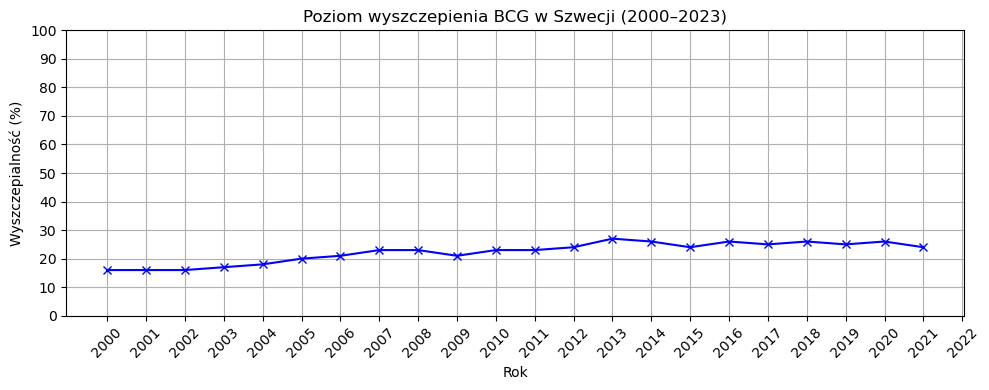

In [7]:
sweden_df = bcg_df.loc[bcg_df['country'] == 'Sweden']
years = [str(year) for year in range(2000, 2024)]
sweden_df = sweden_df.set_index('country')
sweden_df = sweden_df[years]
vac_rates_sweden = sweden_df.loc['Sweden', years].values


plt.figure(figsize=(10,4))
plt.plot(years, vac_rates_sweden, marker='x', linestyle='-', color='blue')
plt.title('Poziom wyszczepienia BCG w Szwecji (2000–2023)')
plt.xlabel('Rok')
plt.ylim(0, 100) 
plt.ylabel('Wyszczepialność (%)')
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### Podsumowanie dotyczące szczepień przeciwko gruźlicy w Szwecji

Biorąc pod uwagę informacje zamieszczone na stronie European Centre  
for Disease Prevention and Control, w Szwecji szczepienia przeciwko  
gruźlicy są zalecane jedynie dzieciom z grup ryzyka — między innymi:

- dzieciom, których rodzice pochodzą z krajów o wysokiej zapadalności,
- dzieciom mającym bliski, długotrwały kontakt z osobą chorą na gruźlicę,
- dzieciom planującym podróż do krajów o dużej zapadalności na gruźlicę  
  na co najmniej 3 miesiące.

Taka selektywna strategia wyjaśnia niskie wskaźniki wyszczepialności w  
statystykach i wskazuje, że niski procent zaszczepionych dzieci wynika  
z racjonalnej polityki zdrowotnej, a nie z zaniedbania.

### Przyjrzyjmy się zatem jak wygląda sytuacja w kraju słabiej rozwiniętym - Dżibuti.

In [8]:
djibouti_df = bcg_df.loc[bcg_df['country'] == 'Djibouti'] 
djibouti_df

,unicef_region,iso3,country,vaccine,2023,2022,2021,2020,2019,2018,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
38,MENA,DJI,Djibouti,BCG,65.0,61.0,61.0,77.0,95.0,93.0,...,90.0,90.0,90.0,88.0,80.0,71.0,63.0,52.0,38.0,34.0


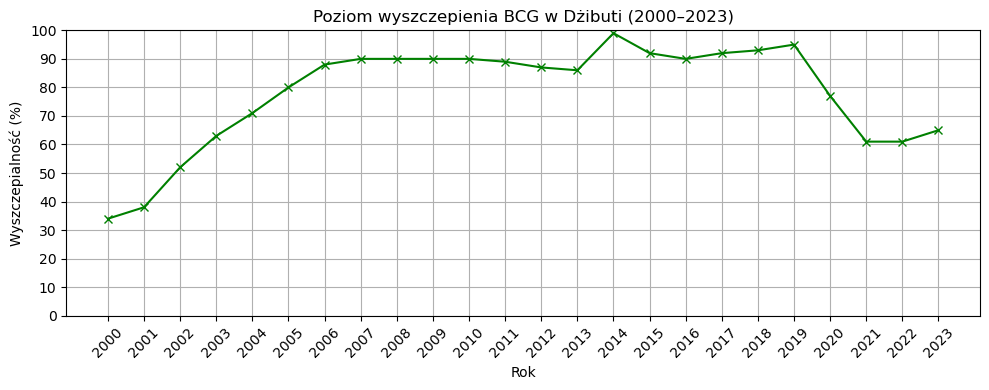

In [9]:

djibouti_df = djibouti_df.set_index('country')
djibouti_df = djibouti_df[years]
vac_rates_djibouti = djibouti_df.loc['Djibouti', years].values


plt.figure(figsize=(10,4))
plt.plot(years, vac_rates_djibouti, marker='x', linestyle='-', color='green')
plt.title('Poziom wyszczepienia BCG w Dżibuti (2000–2023)')
plt.xlabel('Rok')
plt.ylim(0, 100) 
plt.ylabel('Wyszczepialność (%)')
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### Niestabilność szczepień w Dżibuti – przykład zmiennej wyszczepialności

W Dżibuti poziom wyszczepialności przeciwko gruźlicy ulegał znacznym wahaniom w ciągu ostatnich dwóch dekad:

- W **2000 roku** wynosił zaledwie **34%**.
- Do **2014 roku** wzrósł spektakularnie do **99%**, co świadczy o silnych działaniach szczepiennych.
- W kolejnych latach zaczął spadać i w **2023 roku** wynosił około **60%**.

 Mimo spadku względem szczytowych lat, poziom 60% to **wyraźna poprawa** względem początku analizowanego okresu.  
Z mojego punktu widzenia może to być efekt **rosnącej globalnej świadomości problemów zdrowotnych**, a także **działań humanitarnych**, które zwiększają szanse na dostęp do szczepień w regionach wymagających wsparcia, takich jak Róg Afryki.

### Ostatnim krajem, nad którym się pochylimy będzie Czad.

In [10]:
chad_df = bcg_df.loc[bcg_df['country'] == 'Chad']
chad_df

,unicef_region,iso3,country,vaccine,2023,2022,2021,2020,2019,2018,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
24,WCAR,TCD,Chad,BCG,92.0,92.0,92.0,85.0,75.0,51.0,...,47.0,31.0,45.0,57.0,41.0,41.0,40.0,46.0,52.0,49.0


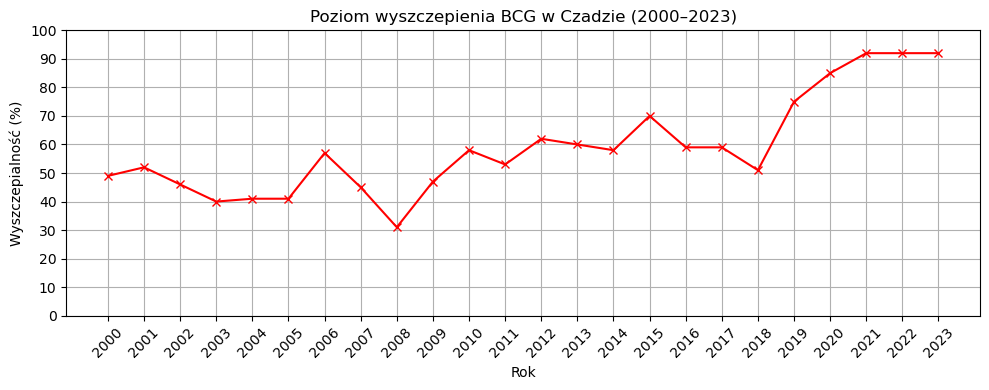

In [11]:
years = [str(year) for year in range(2000, 2024)]
chad_df = chad_df.set_index('country')
chad_df = chad_df[years]
vac_rates_chad = chad_df.loc['Chad', years].values


plt.figure(figsize=(10,4))
plt.plot(years, vac_rates_chad, marker='x', linestyle='-', color='red')
plt.title('Poziom wyszczepienia BCG w Czadzie (2000–2023)')
plt.xlabel('Rok')
plt.ylim(0, 100) 
plt.ylabel('Wyszczepialność (%)')
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

###  Wzloty i upadki z pozytywnym trendem – przypadek Czadu

W przypadku Czadu obserwujemy wyraźną **tendencję wzrostową** poziomu wyszczepialności przeciwko gruźlicy:

- W **2000 roku** poziom szczepień wynosił zaledwie **49%**.
- W ciągu kolejnych lat dane pokazywały **wzloty i spadki**, co może wskazywać na niestabilność systemu zdrowia i wyzwania logistyczne.
- Mimo to, do **2023 roku** poziom wyszczepialności osiągnął aż **92%**.


Historia Czadu w ostatnich dwóch dekadach może być uznana za **inspirujący przykład dążenia do poprawy stanu zdrowia publicznego**. To kraj, nad którego drogą do zwiększenia wyszczepialności warto się pochylić – pokazuje, że nawet przy trudnych warunkach i wyzwaniach można osiągnąć znaczący postęp.


## Podsumowanie pozytywne 

Analiza poziomu wyszczepialności BCG w krajach świata na podstawie najnowszych dostępnych danych przynosi optymistyczne rezultaty.

W 2023 roku aż 98 z 164 analizowanych krajów, czyli około 60%, osiągnęło wyszczepialność przeciw gruźlicy na poziomie co najmniej 90%.
Możemy również zauważyć na wykresie poniżej, że 
To bardzo dobry sygnał, który potwierdza skuteczność programów szczepień oraz zaangażowanie wielu państw w ochronę zdrowia publicznego.


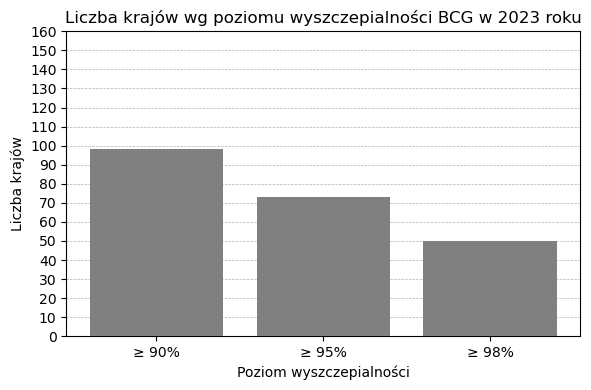

In [12]:
df_sorted_by_2023 = bcg_df.sort_values(by='2023',ascending=False)
vac_over_98 = df_sorted_by_2023.loc[df_sorted_by_2023['2023'] >= 98].shape[0]
vac_over_95 = df_sorted_by_2023.loc[df_sorted_by_2023['2023'] >= 95].shape[0]
vac_over_90 = df_sorted_by_2023.loc[df_sorted_by_2023['2023'] >= 90].shape[0]

x = ['≥ 90%', '≥ 95%', '≥ 98%']
y = [vac_over_90, vac_over_95, vac_over_98]



plt.figure(figsize=(6, 4))
plt.bar(x, y, color = 'grey',zorder = 3)
plt.yticks(range(0,165,10))
plt.title("Liczba krajów wg poziomu wyszczepialności BCG w 2023 roku")
plt.xlabel("Poziom wyszczepialności")
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.5,zorder = 0)
plt.ylabel("Liczba krajów")
plt.tight_layout()
plt.show()

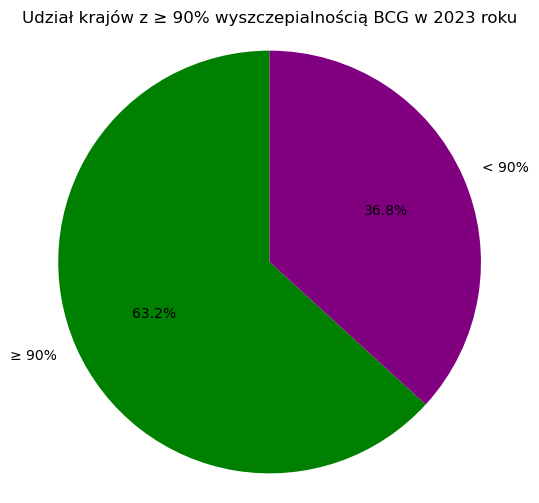

In [13]:
vac_below_90 = df_sorted_by_2023.loc[df_sorted_by_2023['2023'] < 90].shape[0]

labels = ['≥ 90%', '< 90%']
values = [vac_over_90, vac_below_90]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors = ['green','purple'])
plt.title("Udział krajów z ≥ 90% wyszczepialnością BCG w 2023 roku")
plt.axis('equal')  # zapewnia okrągły kształt
plt.show()

#### Wykres kołowy dodatkowo podkreśla, że ponad 60% krajów osiąga pokrycie szczepień BCG na poziomie 90% lub wyższym, co świadczy o szerokim zasięgu i skuteczności programów szczepień na świecie.

# Refleksja
Początkowo zakładałam, że uda mi się wskazać grupę krajów, które znacząco poprawiły poziom wyszczepialności pomimo niskiego punktu wyjścia. Wśród analizowanych przypadków jednym z takich krajów jest Czad. W trakcie pracy zauważyłam także inne, równie interesujące zjawiska. Zidentyfikowałam trzy różne grupy krajów charakteryzujące się odmienną dynamiką zmian w pokryciu szczepieniami i postanowiłam przyjrzeć się bliżej ich przebiegowi.

Co istotne, odkrycie kraju o niezmiennie niskim poziomie wyszczepialności — jak Szwecja — nie musi świadczyć o problemach systemowych czy potrzebie wsparcia. Może to wynikać z odmiennego podejścia do profilaktyki lub niskiej zapadalności na gruźlicę, co podkreśla, jak ważny jest kontekst epidemiologiczny i kulturowy przy interpretacji danych.

Ponadto zauważyłam, że większość krajów osiąga bardzo wysokie poziomy wyszczepialności, co osobiście mnie cieszy i daje poczucie, że globalne programy szczepień przynoszą efekty.
W tej analizie zabrakło jednak połączenia danych o wyszczepialności z danymi epidemiologicznymi, np. zachorowalnością na gruźlicę. To pozwoliłoby lepiej zrozumieć, gdzie niski poziom szczepień realnie wpływa na śmiertelność lub obciążenie zdrowotne populacji.

W przyszłych pracach planuję położyć większy nacisk na wizualizację danych, aby jeszcze lepiej wspierać interpretację i wyciąganie wniosków oraz integrować różne źródła danych dla pełniejszego obrazu sytuacji.